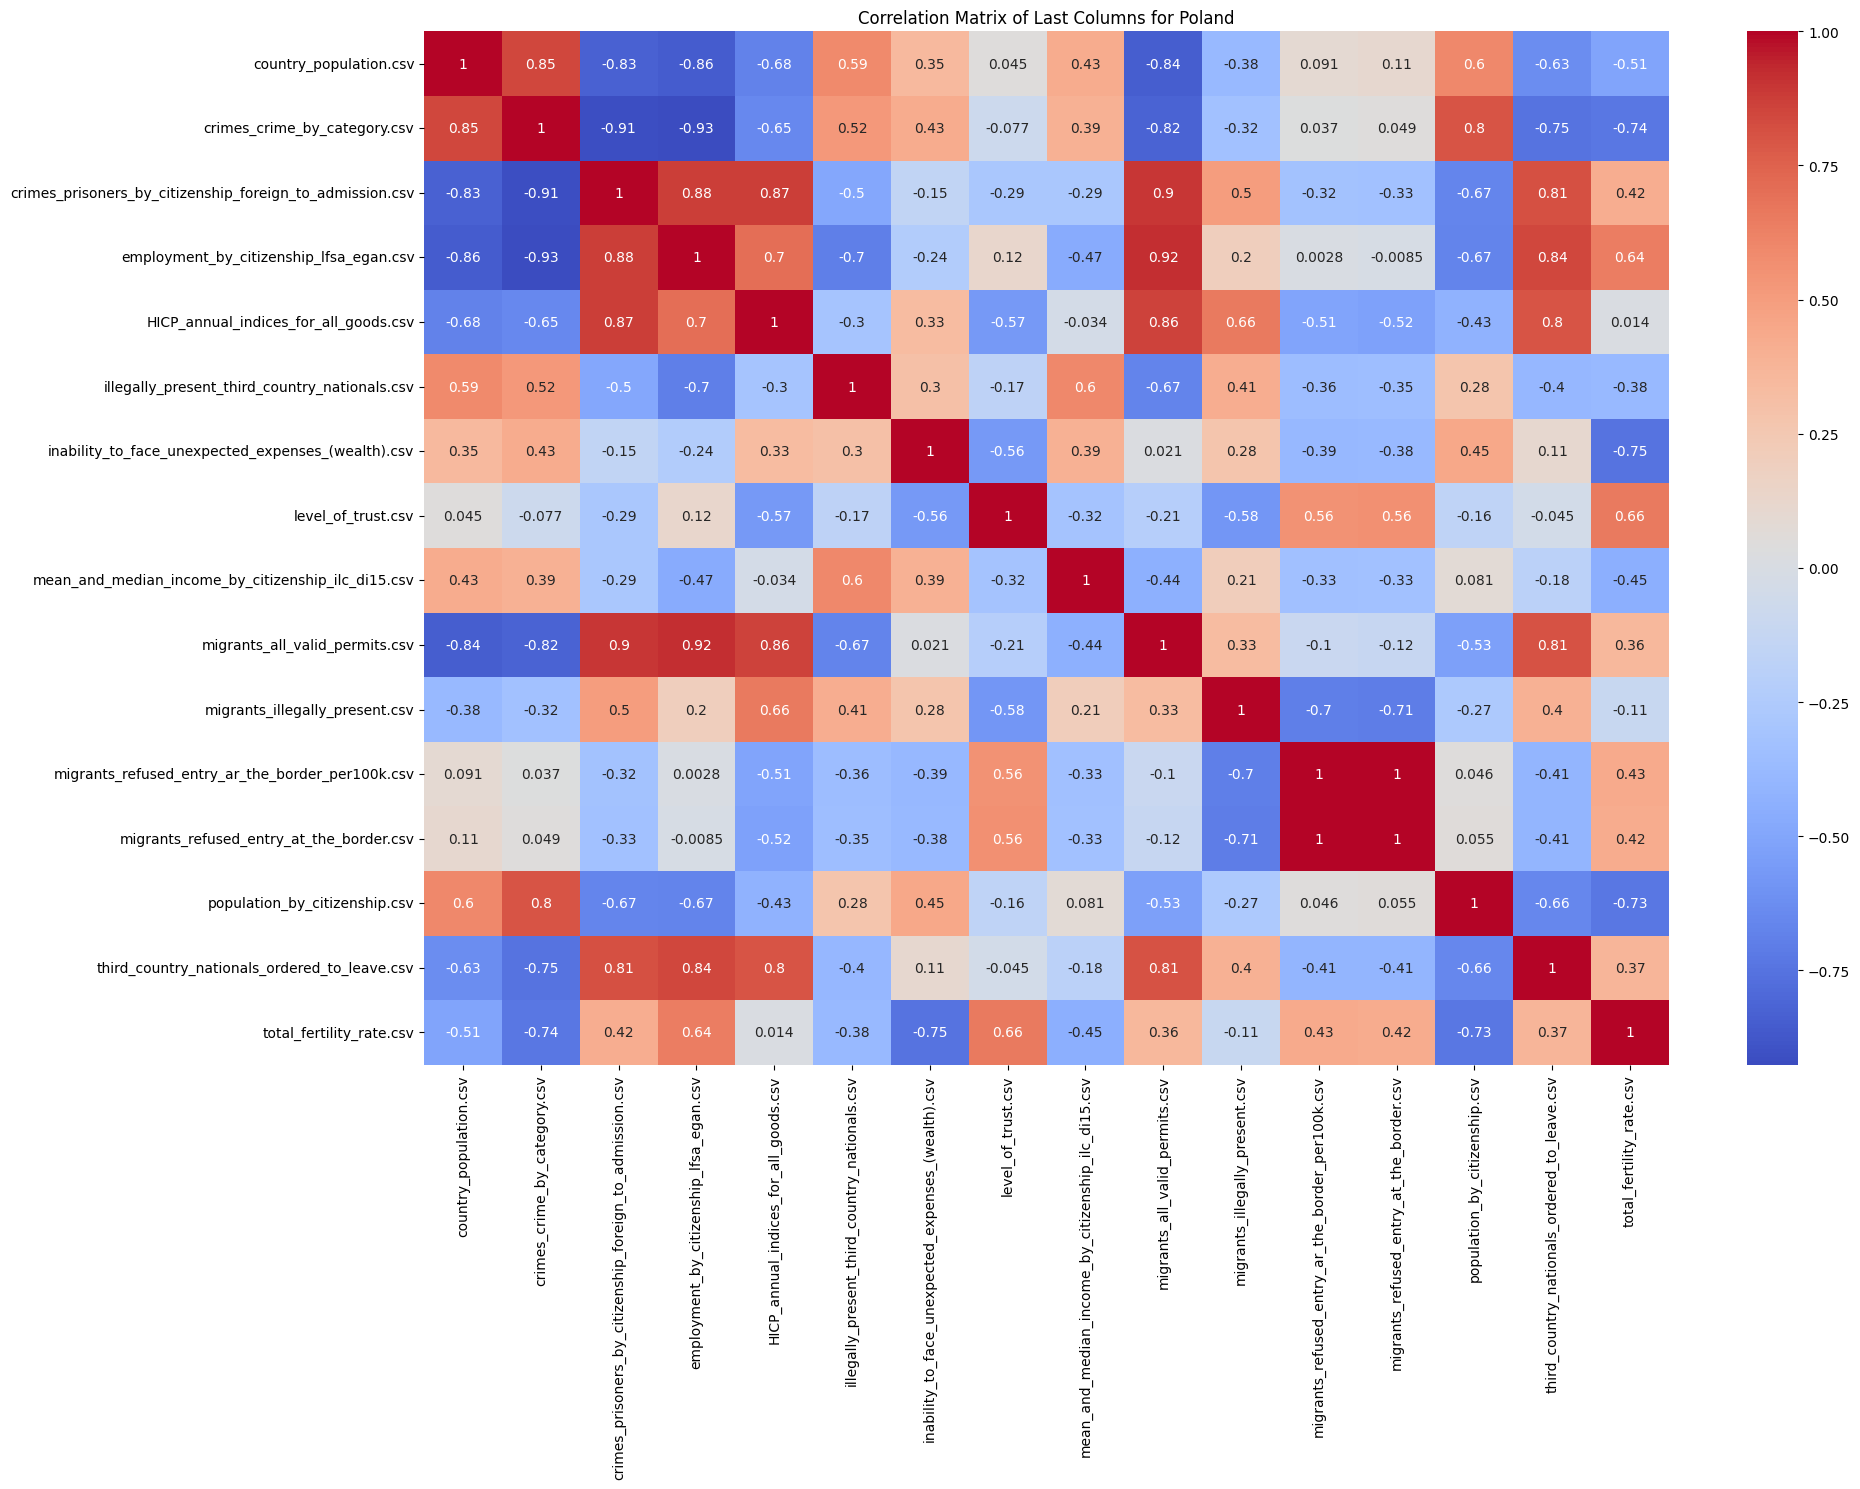

In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

folder_path = r'../processed_data'

value_column = {}

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    
    if not os.path.isfile(file_path) or not filename.endswith('.csv'):
        continue
    
    try:
        df = pd.read_csv(file_path)
        
        if 'geo' in df.columns:
            country = "Poland"
            df = df[df['geo'] == country]
        
        if df.empty:
            continue
        
        last_col_name = df.columns[-1]
        last_col_data = df.iloc[:, -1]
        
        value_column[filename] = last_col_data.reset_index(drop=True)

    except Exception as e:
        print(f"Error processing {filename}: {e}")

combined_df = pd.DataFrame(value_column)
combined_df.dropna(inplace=True)
corr_matrix = combined_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(f'Correlation Matrix of Last Columns for {country}')
plt.tight_layout()
plt.show()
